In [65]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#Loading data training data.
data = pd.read_csv('/home/aniseti/Documents/MachineLearningWorkflow/data/ML-week1-challenge-master/data/train_data_week_1_challenge.csv')
data.head()


,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [57]:
# checking for null values in the dataset
data.isnull().sum()

continue_drop           0
student_id              0
gender                  0
caste                   0
mathematics_marks       0
english_marks           0
science_marks           0
science_teacher         0
languages_teacher       0
guardian                0
internet                0
school_id               0
total_students          0
total_toilets         312
establishment_year    312
dtype: int64

In [58]:
# filling null values in the dataset
data["total_toilets"].fillna(data["total_toilets"].mean(), inplace = True)
data["establishment_year"].fillna(data["establishment_year"].mean(), inplace = True)
data.isnull().sum()


continue_drop         0
student_id            0
gender                0
caste                 0
mathematics_marks     0
english_marks         0
science_marks         0
science_teacher       0
languages_teacher     0
guardian              0
internet              0
school_id             0
total_students        0
total_toilets         0
establishment_year    0
dtype: int64

In [59]:
# encoding categorical values
cleanup_nums = {"continue_drop":{"continue":1,"drop":0},
                "gender":{"F":0,"M":1},
                "caste":{"BC":0,"SC":1,"OC":2,"ST":3},
                "guardian":{"mother":0,"father":1,"other":2,"mixed":3}
               }

data.replace(cleanup_nums, inplace=True)

data.internet = data.internet.astype(int)
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,s01746,1,0,0.666,0.468,0.666,7,6,2,1,305,354,86.0,1986.0
1,1,s16986,1,0,0.172,0.420,0.172,8,10,0,0,331,516,15.0,1996.0
2,1,s00147,0,0,0.212,0.601,0.212,1,4,0,0,311,209,14.0,1976.0
3,1,s08104,0,3,0.434,0.611,0.434,2,5,1,1,364,147,28.0,1911.0
4,1,s11132,0,1,0.283,0.478,0.283,1,10,0,1,394,122,15.0,1889.0


In [7]:
# dropping unused columns
data.drop('student_id', axis=1, inplace=True)
data.drop('school_id', axis=1, inplace=True)
data.drop('establishment_year', axis=1, inplace=True)
data.head()

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students,total_toilets
0,1,1,0,0.666,0.468,0.666,7,6,2,1,354,86.0
1,1,1,0,0.172,0.420,0.172,8,10,0,0,516,15.0
2,1,0,0,0.212,0.601,0.212,1,4,0,0,209,14.0
3,1,0,3,0.434,0.611,0.434,2,5,1,1,147,28.0
4,1,0,1,0.283,0.478,0.283,1,10,0,1,122,15.0


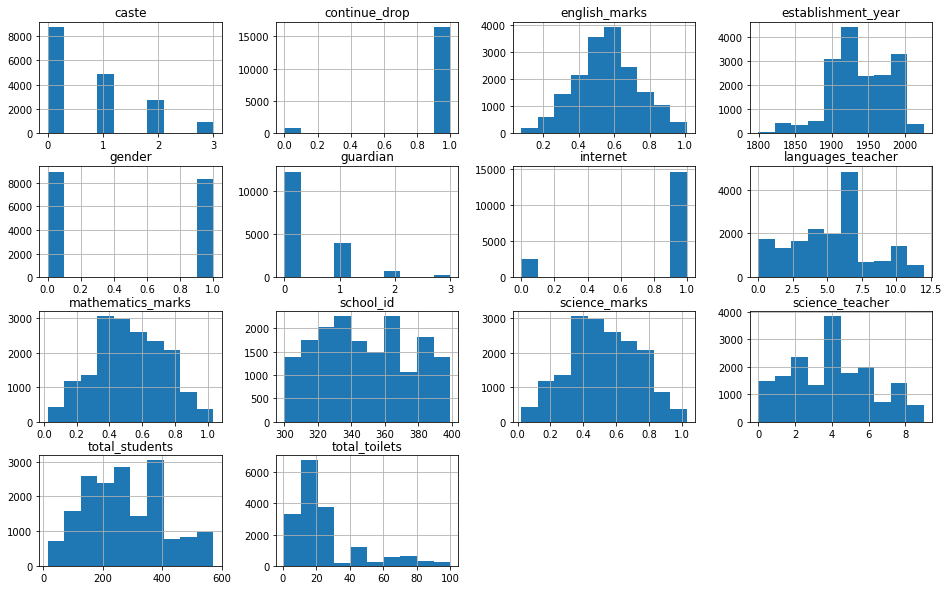

In [63]:
data.hist(figsize=(16,10));

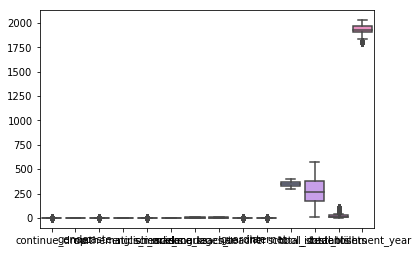

In [66]:
fig, ax = plt.subplots()
sns.boxplot(data=data, orient='v')
plt.show()

### logistic regression
```working with this algorithm for classification involves several steps but in this case i find out that ,although the problem is surely supervised but logistic is working great for data dependent in some way but in this problem data seems 
dependent but the way they work with algorithm is different that is for each feature the algorithm have to figure out the best feature to do separation (deciding classes observed) and the algorithm for this is decision tree from the formula entropy_gain = parent_entropy(pilog(pi)) - child_entropy(fraction.sum(pilog(pi)) and like wise for random forest hence both use the same principal``` 

In [67]:
#feature = ['gender', 'caste', 'mathematics_marks', 'english_marks', 'science_marks', 'science_teacher', 'languages_teacher', 'guardian', 'internet', 'total_students',
 #      'total_toilets']
feature = ['mathematics_marks', 'english_marks', 'science_marks']
X= data[feature] # input feature
y= data.continue_drop # output label

In [68]:
# Spilling of Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234)

In [18]:
# logistic Regression model
from sklearn.linear_model import LogisticRegression   # 1. choose model class
model = LogisticRegression(solver='liblinear')                          # 2. instantiate model
model.fit(x_train, y_train)   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
model.coef_

array([[ 2.19845557e-01, -6.48721962e-02,  7.11969967e-01,
        -2.11436949e+00,  7.11969967e-01, -2.26915568e-01,
         2.29206417e-02,  5.82728682e-02, -9.27798019e-01,
        -1.03462090e-04, -2.31206119e-03]])

In [37]:
y_pred1 = model.predict(x_test) 

In [38]:
#f1_score metric
from sklearn.metrics import f1_score
test_acc = f1_score(y_test, y_pred1)
print("Test Accuracy: {}".format(test_acc))

Test Accuracy: 0.9752026704816403


In [39]:
# Crossing checking predicted and actual data
from sklearn.metrics import confusion_matrix
value = confusion_matrix(y_test,y_pred1)
value

array([[   0,  208],
       [   0, 4090]])

In [40]:
from sklearn.metrics import recall_score,precision_score
print("recall is : {} and precision : {}".format(recall_score(y_test,y_pred1),precision_score(y_test,y_pred1)))

recall is : 1.0 and precision : 0.9516053978594695


In [23]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred1)

1.6715290382519559

In [69]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split=50)


In [70]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
pr = clf.predict(x_test)

In [72]:
#f1_score metric
from sklearn.metrics import f1_score
test_acc = f1_score(y_test, pr)
print("Test Accuracy: {}".format(test_acc))

Test Accuracy: 1.0


In [73]:
# Crossing checking predicted and actual data
from sklearn.metrics import confusion_matrix
value = confusion_matrix(y_test,pr)
value

array([[ 208,    0],
       [   0, 4090]])

In [74]:
from sklearn.metrics import recall_score,precision_score
print("recall is : {} and precision : {}".format(recall_score(y_test,pr),precision_score(y_test,pr)))

recall is : 1.0 and precision : 1.0


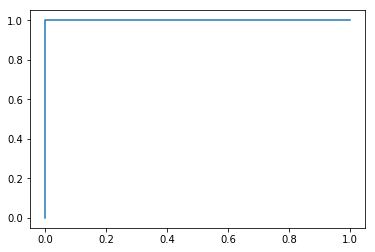

In [78]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thr = roc_curve(y_test, pr)
auc = roc_auc_score(y_test, pr)
plt.plot(fpr,tpr)

```the most important features are mathematics_marks, english_marks, science_marks ```


In [79]:
#Loading data training data.
test_data = pd.read_csv('/home/aniseti/Documents/MachineLearningWorkflow/data/ML-week1-challenge-master/data/test_data_week_1_challenge.csv')
test_data.head()


,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,s00529,F,BC,0.212,0.601,0.212,1,4,mother,False,341,430,44.0,1959.0
1,s13519,F,BC,0.511,0.551,0.511,1,5,mother,True,329,275,60.0,1914.0
2,s01753,M,BC,0.890,0.644,0.890,2,2,mother,True,390,140,14.0,1972.0
3,s00034,F,BC,0.355,0.373,0.355,7,4,mother,True,336,206,17.0,1940.0
4,s03027,F,BC,0.691,0.147,0.691,4,3,father,True,361,287,15.0,1992.0


In [86]:
np.sum(test_data.isnull())

gender                0
caste                 0
mathematics_marks     0
english_marks         0
science_marks         0
science_teacher       0
languages_teacher     0
guardian              0
internet              0
total_students        0
total_toilets        26
dtype: int64

In [87]:

test_data.head()

,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students,total_toilets
0,F,BC,0.212,0.601,0.212,1,4,mother,False,430,44.0
1,F,BC,0.511,0.551,0.511,1,5,mother,True,275,60.0
2,M,BC,0.890,0.644,0.890,2,2,mother,True,140,14.0
3,F,BC,0.355,0.373,0.355,7,4,mother,True,206,17.0
4,F,BC,0.691,0.147,0.691,4,3,father,True,287,15.0


In [89]:
# encoding categorical values
cleanup_nums = {"continue_drop":{"continue":1,"drop":0},
                "gender":{"F":0,"M":1},
                "caste":{"BC":0,"SC":1,"OC":2,"ST":3},
                "guardian":{"mother":0,"father":1,"other":2,"mixed":3}
               }

test_data.replace(cleanup_nums, inplace=True)

test_data.internet = data.internet.astype(int)
test_data.head()

,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,total_students,total_toilets
0,0,0,0.212,0.601,0.212,1,4,0,1,430,44.0
1,0,0,0.511,0.551,0.511,1,5,0,0,275,60.0
2,1,0,0.890,0.644,0.890,2,2,0,0,140,14.0
3,0,0,0.355,0.373,0.355,7,4,0,1,206,17.0
4,0,0,0.691,0.147,0.691,4,3,1,1,287,15.0


In [90]:
test_feature = ['mathematics_marks', 'english_marks', 'science_marks']
x = test_data[test_feature]

In [91]:
classes = clf.predict(x)
classes

array([1, 1, 1, ..., 1, 1, 1])

In [53]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()


In [54]:
clf.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
pg = clf.predict(x_test)

In [43]:
#f1_score metric
from sklearn.metrics import f1_score
test_acc = f1_score(y_test, pg)
print("Test Accuracy: {}".format(test_acc))

Test Accuracy: 0.9754352492248987


In [44]:
from sklearn.metrics import confusion_matrix
value = confusion_matrix(y_test,pg)
value

array([[   2,  206],
       [   0, 4090]])

In [45]:
from sklearn.metrics import recall_score,precision_score
print("recall is : {} and precision : {}".format(recall_score(y_test,pg),precision_score(y_test,pg)))

recall is : 1.0 and precision : 0.952048417132216


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.9516053978594695

In [23]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred1)

0.9516053978594695

In [25]:
from sklearn.metrics import precision_recall_curve
pr,rc,a = precision_recall_curve(y_test, y_pred1)

In [29]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thr = roc_curve(y_test, y_pred1)
auc = roc_auc_score(y_test, y_pred1)

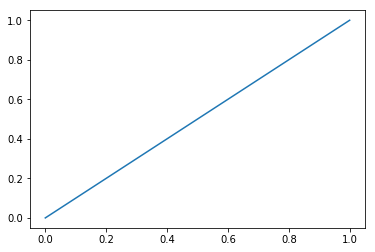

In [32]:
plt.plot(fpr,tpr)

In [57]:
from sklearn.svm import SVC

In [63]:
clf = SVC(C=1000,gamma=100,kernel='linear')

In [ ]:
#clf.fit(x_train,y_train)

In [60]:
clf.coef_

array([[ 0.00000000e+00,  0.00000000e+00, -1.39493133e-05,
        -1.09072064e-04, -1.39493133e-05]])

In [61]:
p = clf.predict(x_test)

In [62]:
# Crossing checking predicted and actual data
from sklearn.metrics import confusion_matrix
value = confusion_matrix(y_test,p)
value

array([[   0,  208],
       [   0, 4090]])

In [39]:
x_new = data[['gender', 'caste', 'mathematics_marks', 'english_marks', 'science_marks']]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y,
                                                    test_size=0.25,
                                                    random_state=1234)

In [42]:
# logistic Regression model
from sklearn.linear_model import LogisticRegression   # 1. choose model class
model = LogisticRegression(solver='liblinear')                          # 2. instantiate model
model.fit(x_train, y_train)   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
y_pred = model.predict(x_test) 

In [47]:
#f1_score metric
from sklearn.metrics import f1_score
test_acc = f1_score(y_test, y_pred)
print("Test Accuracy: {}".format(test_acc))

Test Accuracy: 0.9752026704816403


In [48]:
# Crossing checking predicted and actual data
from sklearn.metrics import confusion_matrix
value = confusion_matrix(y_test,y_pred)
value

array([[   0,  208],
       [   0, 4090]])

# conclusion
``` however now after trying a lot of algorithm the result is the problem seems to be solved by algorithms with which optimization
does not depends on weight```

### Model imbalance
```A two-class data set is said to be imbalanced (or skewed) when one of the classes (theminority one) is heavily under-represented in comparison to the other class (the majority one). according to "The class imbalance problem in pattern classification and learning" by V. García
J.S. Sánchez R.A. Mollineda
R. Alejo J.M. Sotoca 

Technique to work with imbalanced data

Resampling

Resampling is the process of reconstructing the data sample from the actual data sets either by non-statistical estimation or statistical estimation.

Undersampling



Random undersampling is a method in which we randomly select the samples from the majority class and discard the remaining.

Oversampling



While undersampling aims to achieve an equal distribution by eliminating majority class samples, oversampling does this by replicating the minority samples so that the distribution is balanced.


Conclusion

Imbalanced data is one of the potential problems in the field of data mining and machine learning. This problem can be approached by properly analyzing the data. A few approaches that help us in tackling the problem at the data point level are undersampling, oversampling, and feature selection. Moving forward, there is still a lot of research required in handling the data imbalance problem more efficiently.
```